1) Clone https://github.com/adamnguyenitvn/UIT_bigdata_labs_2019

2) Open *.ipynb

3) Make a copy of *.ipynb, name it with your studentID_*.ipynb

4) Do the exercise

5) Write your github username here http://socrates.io/#hFiGynu . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

Note that you should use Python 3 for all exercises.

# Introducing Pandas

Pandas is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

It's one of three libraries you'll encounter repeatedly in the field of data science:

## Pandas
Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information.

## NumPy
Usually you'll encounter "NumPy arrays", which are multi-dimensional array objects. It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays. NumPy arrays are mainly important because of...

Do the following exercise.

%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv")

df.head()

head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [3]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


You can also view the end of your data with tail():

In [4]:
df.tail(4)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [4]:
df.shape

(13, 7)

The total size of the data frame is the rows * columns:

In [5]:
df.size

91

The len() function gives you the number of rows in a DataFrame:

In [6]:
len(df)

13

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [7]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [8]:
df['Hired']

0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object

You can also extract a given range of rows from a named column, like so:

In [9]:
df['Hired'][:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Hired, dtype: object

Or even extract a single value from a specified column / row combination:

In [10]:
df['Hired'][5]

'Y'

To extract more than one column, you pass in a list of column names instead of a single one:

In [11]:
df[['Years Experience', 'Hired']]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N
5,0,Y
6,5,Y
7,3,Y
8,15,Y
9,0,N


You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [12]:
df[['Years Experience', 'Hired']][:5]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N


Sorting your DataFrame by a specific column looks like this:

In [13]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [14]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

Pandas even makes it easy to plot a Series or DataFrame - just call plot():

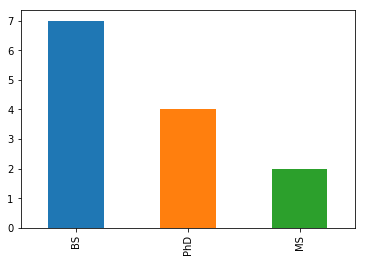

In [15]:
degree_counts.plot(kind='bar')

## Exercise

Try extracting rows 5-10 of our DataFrame, preserving only the "Previous Employers" and "Hired" columns. Assign that to a new DataFrame, and create a histogram plotting the distribution of the previous employers in this subset of the data.

# 2. Series


The first main data type we will learn about for pandas is the Series data type. Let's
import Pandas and explore the Series object.
A Series is very similar to a NumPy array (in fact it is built on top of the NumPy
array object). What differentiates the NumPy array from a Series, is that a Series can have
axis labels, meaning it can be indexed by a label, instead of just a number location. It also
doesn't need to hold numeric data, it can hold any arbitrary Python Object.
Let's explore this concept through some examples:

In [5]:
import numpy as np
import pandas as pd


# 2.1 Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [6]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

Using Lists

In [7]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [8]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

NumPy Arrays

In [9]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [10]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

Dictionary

In [11]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

# 2.2 Data in Series


A pandas Series can hold a variety of object types:

In [12]:
pd.Series(data=labels)


0    a
1    b
2    c
dtype: object

In [13]:
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

# 2.3 Using an index

The key to using a Series is understanding its index. Pandas makes use of these
index names or numbers by allowing for fast look ups of information (works like a hash
table or dictionary).
Let's see some examples of how to grab information from a Series. Let us create two
sereis, ser1 and ser2:

In [14]:
ser1=pd.Series([1,2,3,4],index = ['USA','Germany','USSR','Japan'])

In [15]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [16]:
ser2=pd.Series([1,2,5,4],index = ['USA','Germany','Italy','Japan'])

In [17]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [18]:
ser1['USA
     ']

SyntaxError: EOL while scanning string literal (<ipython-input-18-6d6eef332cb9>, line 1)

In [19]:
ser1['USA
     ']

SyntaxError: EOL while scanning string literal (<ipython-input-19-6d6eef332cb9>, line 1)

In [20]:
ser1['USA']

1

Operations are then also done based off of index:

In [21]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

Let's stop here for now and move on to DataFrames, which will expand on the
concept of Series!

# 3. DataFrames


DataFrames are the workhorse of pandas and are directly inspired by the R
programming language. We can think of a DataFrame as a bunch of Series objects put
together to share the same index. Let's use pandas to explore this topic!

In [22]:
import numpy as np
import pandas as pd

In [23]:
from numpy.random import randn
np.random.seed(101)

In [24]:
df = pd.DataFrame(randn(5,4),index = 'A B C D E'.split(), columns = 'W X Y Z'.split())

In [25]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


# 3.1 Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [26]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [27]:
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [28]:
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [29]:
type(df['W'])

pandas.core.series.Series

Creating a new column:

In [30]:
df['new'] = df['W'] + df['Y']

In [31]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


Removing Columns

In [32]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [33]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [34]:
df.drop('new',axis=1,inplace=True)

In [35]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [36]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


Can also drop rows this way:

In [37]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


Selecting Rows

In [38]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Or select based off of position instead of label

In [39]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

Selecting subset of rows and columns

In [40]:
df.loc['B','Y']

-0.8480769834036315

In [41]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


# 3.2 Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar
to numpy:

In [42]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [43]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [44]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [45]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [2]:
df[df['W']>0]['Y']

NameError: name 'df' is not defined

In [1]:
df[df['W']>0]['Y','X']

NameError: name 'df' is not defined

In [48]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:

In [49]:
df[(df['W']>0)&(df['Y']>1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


# 3.3 More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it
something else. We'll also talk about index hierarchy!

In [50]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [51]:
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [52]:
newind = 'CA NY WY OR CO'.spit()

AttributeError: 'str' object has no attribute 'spit'

In [53]:
newind = 'CA NY WY OR CO'.split()

In [54]:
df['States']=newind

In [55]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [56]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [57]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [58]:
df.set_index('States',inplace=True)

In [59]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


# 3.4 Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a
Multi-Indexed DataFrame would look like:

In [60]:
outside  = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [61]:
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [62]:
df = pd.DataFrame(np.random.randn(6,2),index = hier_index, columns=['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the
columns axis, you would just use normal bracket notation df[]. Calling one level of the index
returns the sub-dataframe:

In [63]:
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [64]:
df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: 1, dtype: float64

In [65]:
df.index.names

FrozenList([None, None])

In [66]:
df.index.names = ['Group','Num']

In [67]:
df

A         B
Group Num                    
G1    1    0.302665  1.693723
      2   -1.706086 -1.159119
      3   -0.134841  0.390528
G2    1    0.166905  0.184502
      2    0.807706  0.072960
      3    0.638787  0.329646

In [68]:
df.xs('G1')

,A,B
Num,,
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [69]:
df.xs(['G1',1])

A    0.302665
B    1.693723
Name: (G1, 1), dtype: float64

In [70]:
df.xs(1,level='Num')

,A,B
Group,,
G1,0.302665,1.693723
G2,0.166905,0.184502


# 4. Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [71]:
import numpy as np
import pandas as pd

In [72]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [73]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [74]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [75]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [76]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [77]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [78]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# 5. GroupBy

The groupby method allows you to group rows of data together and call aggregate functions

In [81]:
import pandas as pd
data = {'Company':['GOOG','GOOD','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [82]:
df = pd.DataFrame(data)

In [83]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOD,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


Now you can use the .groupby() method to group rows together based off of a column
name. For instance let's group based off of Company. This will create a DataFrameGroupBy
object:

In [84]:
    df.groupby('Company')

You can save this object as a new variable:

In [87]:
by_comp = df.groupby("Company")

In [88]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOD,120.0
GOOG,200.0
MSFT,232.0


In [89]:
df.groupby("Company").mean()

,Sales
Company,
FB,296.5
GOOD,120.0
GOOG,200.0
MSFT,232.0


More examples of aggregate methods:

In [90]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOD,NaN
GOOG,NaN
MSFT,152.735065


In [91]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOD,Charlie,120
GOOG,Sam,200
MSFT,Amy,124


In [92]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOD,Charlie,120
GOOG,Sam,200
MSFT,Vanessa,340


In [93]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOD,1,1
GOOG,1,1
MSFT,2,2


In [94]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOD      1.0  120.0         NaN  120.0  120.00  120.0  120.00  120.0
GOOG      1.0  200.0         NaN  200.0  200.00  200.0  200.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [95]:
by_comp.describe().transpose()

Company              FB   GOOD   GOOG        MSFT
Sales count    2.000000    1.0    1.0    2.000000
      mean   296.500000  120.0  200.0  232.000000
      std     75.660426    NaN    NaN  152.735065
      min    243.000000  120.0  200.0  124.000000
      25%    269.750000  120.0  200.0  178.000000
      50%    296.500000  120.0  200.0  232.000000
      75%    323.250000  120.0  200.0  286.000000
      max    350.000000  120.0  200.0  340.000000

In [96]:
by_comp.describe().transpose()['GOOG']

Sales  count      1.0
       mean     200.0
       std        NaN
       min      200.0
       25%      200.0
       50%      200.0
       75%      200.0
       max      200.0
Name: GOOG, dtype: float64

# 6. Merging, Joining and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and
Concatenating. In this lecture we will discuss these 3 methods with examples.
6.1 Concatenation
Example DataFrame

In [97]:
import pandas as pd

In [98]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']},
                  index=[0,1,2,3])

In [99]:
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                   'B':['B4','B5','B6','B7'],
                   'C':['C4','C5','C6','C7'],
                   'D':['D4','D5','D6','D7']},
                  index=[4,5,6,7])

In [100]:
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                   'B':['B8','B9','B10','B11'],
                   'C':['C8','C9','C10','C11'],
                   'D':['D8','D9','D10','D11']},
                  index=[8,9,10,11])

In [101]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [102]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [103]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [104]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [105]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


# 6.2 Merging

Example DataFrame

In [106]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [107]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [108]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [109]:
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


Or to show a more complicated example:

In [110]:
left = pd.DataFrame({'key1':['K0','K0','K1','K2'],
                    'key2':['K0','K1','K0','K1'],
                     'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key1':['K0','K1','K1','K2'],
                    'key2':['K0','K0','K0','K0'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [111]:
pd.merge(left, right, on=['key1','key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [112]:
pd.merge(left,right,how='outer',on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [113]:
pd.merge(left,right,how='right',on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


In [114]:
pd.merge(left,right,how='left',on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


# 7. Operations
There are lots of operations with pandas that will be really useful to you, but don't fall into
any distinct category. Let's show them here in this lecture:

In [119]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz




# 7.1 Info on Unique Values

In [120]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [121]:
df['col2'].nunique()

3

In [122]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

# 7.2 Selecting Data

In [123]:
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [124]:
newdf

,col1,col2,col3
3,4,444,xyz


# 7.3 Applying Functions

In [125]:
def times2(x):
    return x*2

In [126]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [127]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [128]:
df['col1'].sum()

10

Permanently Removing a Column

In [129]:
del df['col1']

In [130]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


Get column and index names:

In [131]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [132]:
df.index

RangeIndex(start=0, stop=4, step=1)

Sorting and Ordering a DataFrame:

In [133]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [134]:
df.sort_values(by='col2')

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


Find Null Values or Check for Null Values

In [135]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [136]:
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


Filling in NaN values with something else:

In [137]:
import numpy as np

In [140]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
               'col2':[np.nan,555,666,444],
               'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [141]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [142]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [143]:
df.dropna()

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [144]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [145]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
       'B':['one','one','two','two','one','one',],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)

In [146]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [148]:
df.pivot_table(values='D',index=['A','B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# 8. Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety
of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [149]:
import numpy as np
import pandas as pd

8.1 CSV
CSV Input

In [150]:
df = pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


CSV Output

In [151]:
df.to_csv('example.csv',index=False)

8.2 Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or
images, having images or macros may cause this read_excel method to crash.
Excel Input

In [154]:
pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

,0,1,2,3
0,4,5,6,7
1,8,9,10,11
2,12,13,14,15


In [159]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet2')

8.3 SQL
The pandas.io.sql module provides a collection of query wrappers to both facilitate data
retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by
SQLAlchemy if installed. In addition you will need a driver library for your database. Examples
of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included
in Python’s standard library by default. You can find an overview of supported drivers for each
SQL dialect in the SQLAlchemy docs.
If SQLAlchemy is not installed, a fallback is only provided for sqlite (and for mysql for
backwards compatibility, but this is deprecated and will be removed in a future version). This
mode requires a Python database adapter which respect the Python DB-API.
See also some cookbook examples for some advanced strategies.
The key functions are:
read_sql_table(table_name, con[, schema, ...])
Read SQL database table into a DataFrame.
read_sql_query(sql, con[, index_col, ...])
Read SQL query into a DataFrame.
read_sql(sql, con[, index_col, ...])
Read SQL query or database table into a DataFrame.
DataFrame.to_sql(name, con[, flavor, ...])
Write records stored in a DataFrame to a SQL database.

In [160]:
from sqlalchemy import create_engine

In [161]:
engine = create_engine('sqlite:///:memory:')

In [162]:
df.to_sql('data',engine)

In [163]:
sql_df = pd.read_sql('data',con=engine)

In [164]:
sql_df

,index,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15
